In [14]:
from pandas_datareader import data as pdr

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
yf.pdr_override()

# Q1: How to get IBM stock data？

In [28]:
ibm_df= pdr.get_data_yahoo('ibm',start='1980-01-01', end='2023-10-23')

ibm_df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,15.057361,15.415870,14.937859,14.937859,4.300865,1723808
1980-01-03,14.937859,15.176864,14.639101,15.176864,4.369678,2553495
1980-01-04,15.176864,15.236616,15.057361,15.146989,4.361080,1978195
1980-01-07,15.146989,15.146989,14.967734,15.087237,4.343875,1480718
1980-01-08,15.087237,16.132887,14.967734,16.103010,4.636330,2968130
...,...,...,...,...,...,...
2023-10-16,139.279999,139.779999,138.520004,139.210007,137.648911,3361500
2023-10-17,137.119995,140.619995,136.309998,140.320007,138.746460,4172800
2023-10-18,140.000000,140.429993,139.580002,139.970001,138.400391,3330000


# Q2: How to plot a gragh of open and close price?

<Axes: xlabel='Date'>

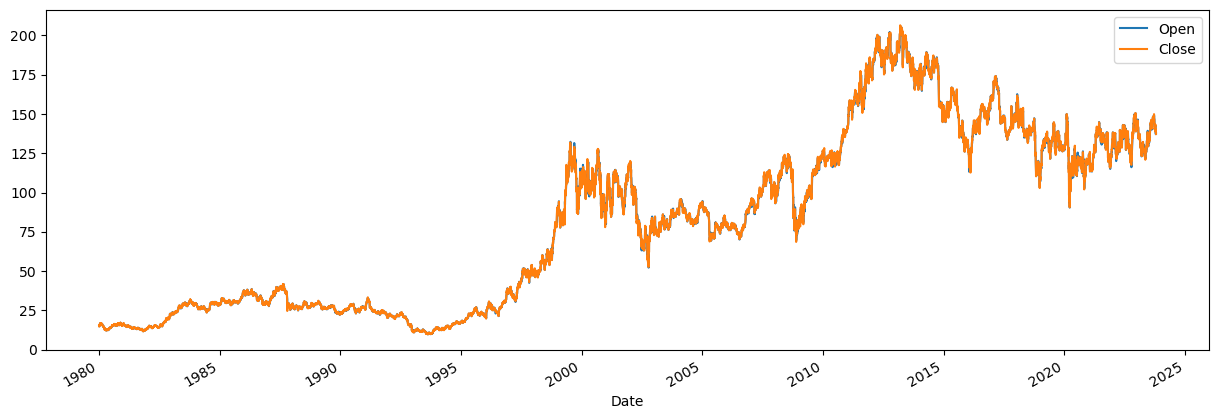

In [29]:
ibm_df.sort_index(ascending=True)[['Open','Close']].plot(figsize=(15,5))

# Q3: How to choose the days which close price higher than 80 dollars?

In [17]:
mask_closeprice = ibm_df.Close > 80
high_price = ibm_df.loc[mask_closeprice]
high_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5618.000000,5618.000000,5618.000000,5618.000000,5618.000000,5.618000e+03
mean,129.124778,130.294950,128.023972,129.182079,89.139004,6.192590e+06
std,31.051043,31.054374,31.051860,31.046794,28.415551,3.682263e+06
min,76.118546,80.248566,72.084129,80.009560,43.834087,1.074765e+06
25%,104.696466,106.058792,103.193714,104.684509,59.862567,3.881078e+06
50%,126.673042,127.994740,125.494999,126.729980,98.777004,5.262217e+06
75%,147.943413,149.034424,147.012135,148.059818,113.294725,7.410021e+06
max,205.908218,206.405350,204.875717,206.309753,148.149811,7.263916e+07


In [18]:
mask_volume = ibm_df.Volume>10000
high_volumeprice = ibm_df.loc[mask_closeprice | mask_volume]
high_volumeprice.describe()

,Open,High,Low,Close,Adj Close,Volume
count,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,1.104400e+04
mean,81.475943,82.237233,80.754101,81.502664,52.873263,6.780711e+06
std,54.933653,55.340982,54.556969,54.958740,42.898694,4.472021e+06
min,9.799235,9.978489,9.709608,9.799235,3.562108,2.966460e+05
25%,27.246655,27.448315,27.007648,27.216778,11.307590,3.995119e+06
50%,80.930332,81.715462,80.124283,81.037285,46.036875,5.702896e+06
75%,127.638626,128.613152,126.412527,127.730003,99.572105,8.260838e+06
max,205.908218,206.405350,204.875717,206.309753,148.149811,7.263916e+07


<Axes: xlabel='Date'>

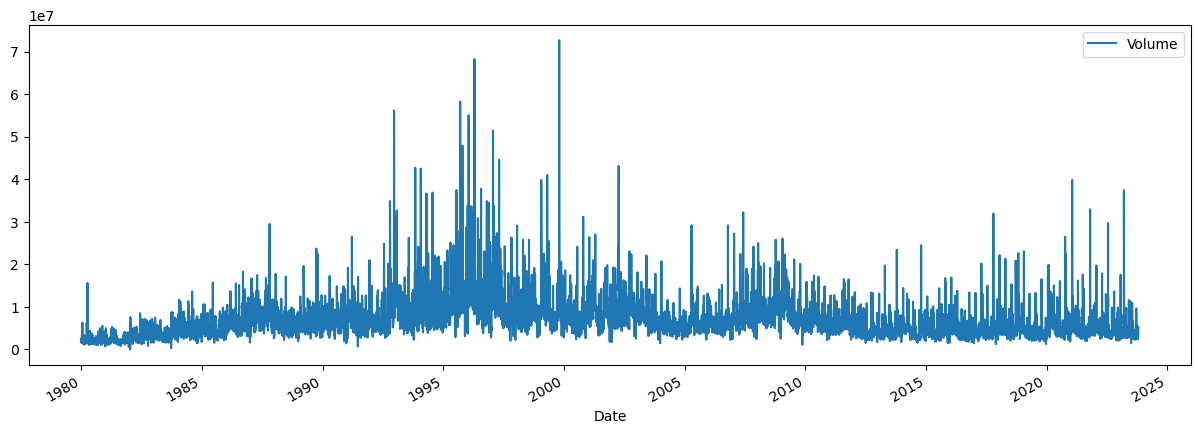

In [19]:
ibm_df.sort_index(ascending=True)[['Volume']].plot(figsize=(15,5))

<Axes: xlabel='Date'>

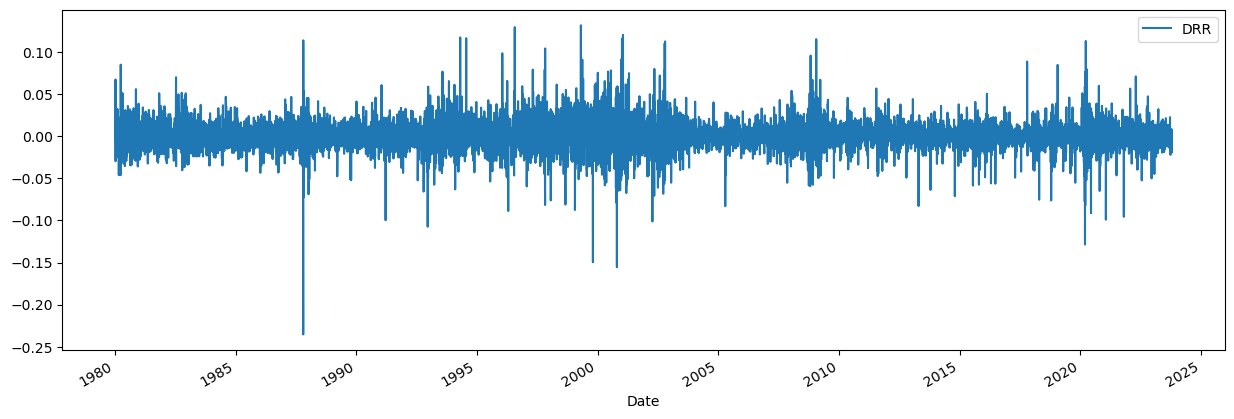

In [20]:
### Daily rate of return
ibm_df['DRR'] = ibm_df['Adj Close'].pct_change()

ibm_df[['DRR']].plot(figsize=(15,5)) 


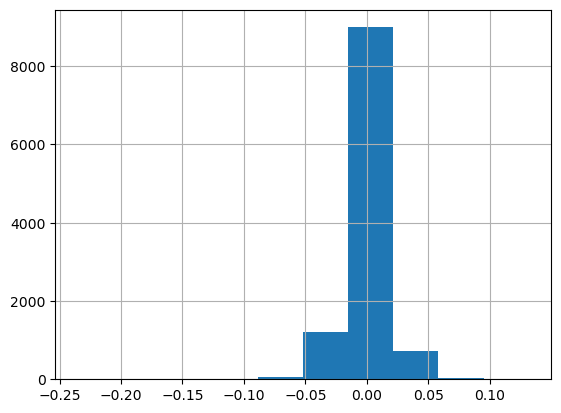

In [23]:
ibm_df['DRR'].hist()
plt.show()



In [49]:
from pandas import DataFrame

data_feed = {}
data_feed['IBM'] = pdr.get_data_yahoo('ibm',start='2023-01-01', end='2023-10-23')
data_feed['AAPL'] = pdr.get_data_yahoo('AAPL',start='2023-01-01', end='2023-10-23')
data_feed['FB'] = pdr.get_data_yahoo('FB.MI',start='2023-01-01', end='2023-10-23')
data_feed['GOOG'] = pdr.get_data_yahoo('GOOG',start='2023-01-01', end='2023-10-23')
price = DataFrame({tic: data['Adj Close'] for tic, data in data_feed.items()})
price



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,IBM,AAPL,FB,GOOG
Date,,,,
2023-01-02,NaN,NaN,114.580002,NaN
2023-01-03,134.852539,124.374802,117.760002,89.699997
2023-01-04,135.852844,125.657639,121.220001,88.709999
2023-01-05,134.433350,124.325081,119.440002,86.769997
2023-01-06,136.900803,128.899521,121.440002,88.160004
...,...,...,...,...
2023-10-16,137.648911,178.484863,302.450012,140.490005
2023-10-17,138.746460,176.916916,305.149994,140.990005
2023-10-18,138.400391,175.608643,303.350006,139.279999


In [50]:
returns = price.pct_change()

<function matplotlib.pyplot.show(close=None, block=None)>

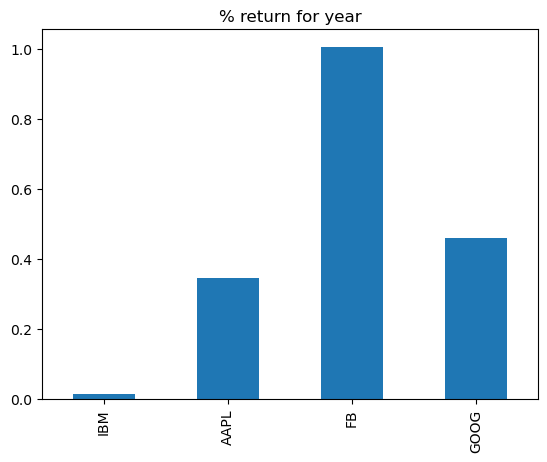

In [51]:
returns.sum().plot(kind = 'bar', title = '% return for year')
plt.show

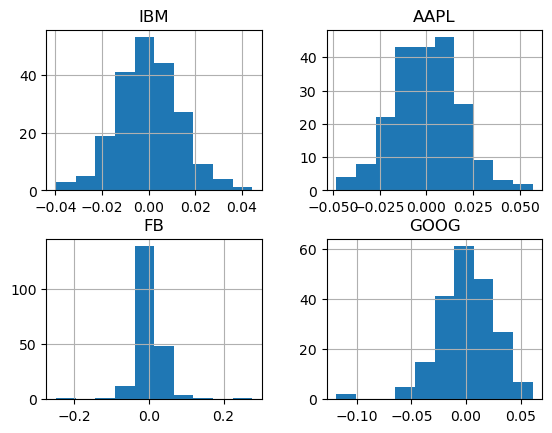

In [52]:
returns.diff().hist()
plt.show()

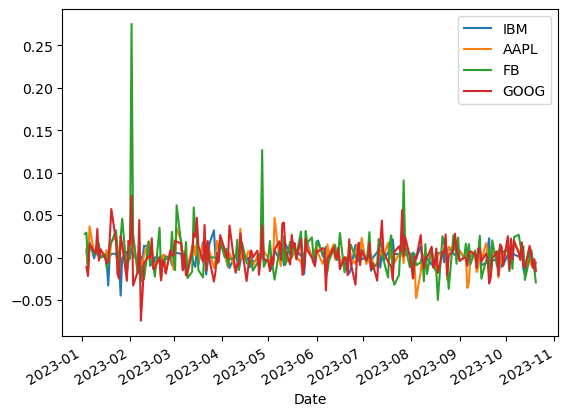

In [53]:
returns.plot()
plt.show()

<Figure size 640x480 with 0 Axes>

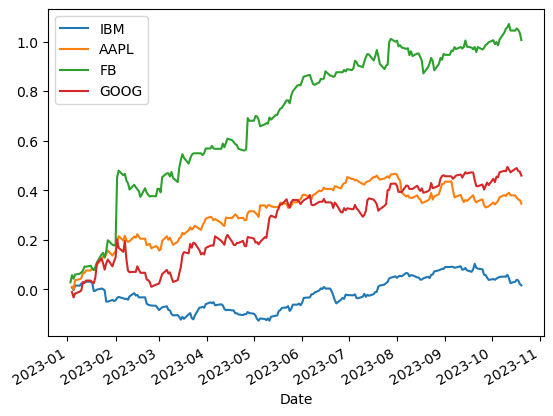

In [54]:
ts = returns.cumsum()
plt.figure(); ts.plot(); plt.legend(loc='upper left')
plt.show()

In [55]:
returns.corr()

,IBM,AAPL,FB,GOOG
IBM,1.000000,0.227177,0.127513,0.126754
AAPL,0.227177,1.000000,0.352592,0.550073
FB,0.127513,0.352592,1.000000,0.462417
GOOG,0.126754,0.550073,0.462417,1.000000


In [64]:
market_data_feed = {}
market_symbols = ['SPY']

for ticker in market_symbols:
    market_data_feed[ticker] = pdr.get_data_yahoo(ticker,start='2023-01-01', end='2023-10-23')
market_price = DataFrame({tic: data['Adj Close'] for tic, data in market_data_feed.items()})

[*********************100%%**********************]  1 of 1 completed


In [65]:
market_returns = market_price.pct_change()

<Figure size 640x480 with 0 Axes>

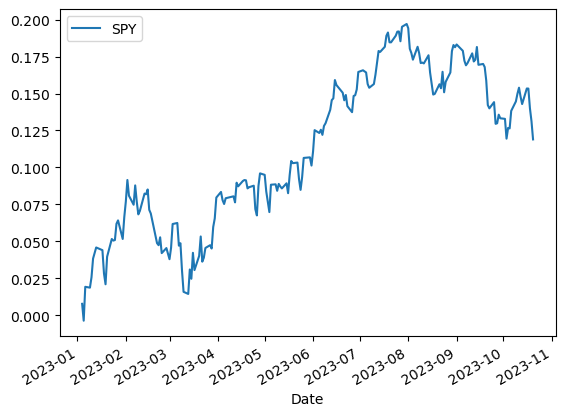

In [67]:
market_returns.cumsum()
mts = market_returns.cumsum()
plt.figure(); mts.plot(); plt.legend(loc = "upper left")

In [72]:
price.head()

,IBM,AAPL,FB,GOOG
Date,,,,
2023-01-02,NaN,NaN,114.580002,NaN
2023-01-03,134.852539,124.374802,117.760002,89.699997
2023-01-04,135.852844,125.657639,121.220001,88.709999
2023-01-05,134.433350,124.325081,119.440002,86.769997
2023-01-06,136.900803,128.899521,121.440002,88.160004


In [73]:
data = price.dropna()

<Axes: xlabel='Date'>

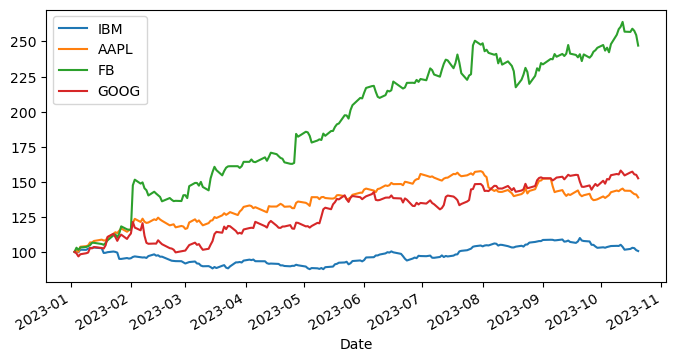

In [74]:
(data/data.iloc[0] * 100).plot(figsize=(8,4))

array([[<Axes: title={'center': 'IBM'}>,
        <Axes: title={'center': 'AAPL'}>],
       [<Axes: title={'center': 'FB'}>, <Axes: title={'center': 'GOOG'}>]],
      dtype=object)

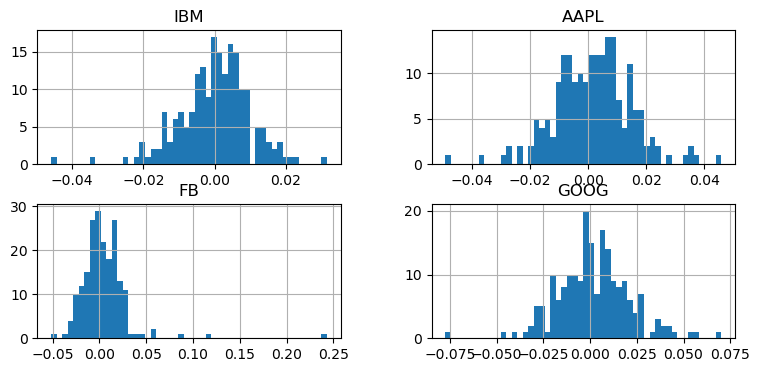

In [76]:
log_returns = np.log(data / data.shift(1))
log_returns.head()
log_returns.hist(bins=50, figsize=(9,4))